In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])

Using Numpy to create sine wave data

In [3]:
x = np.linspace(0,50,501)
y = np.sin(x)

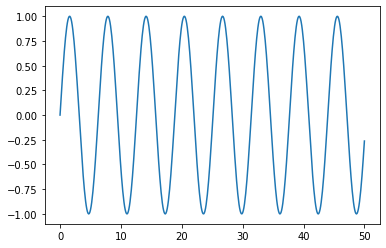

In [4]:
plt.plot(x, y)

In [6]:
df = pd.DataFrame(data=y,index=x,columns=['Sine(x)'])

In [7]:
df.head()

,Sine(x)
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418


In [8]:
len(df)

501

In [9]:
test_percent = 0.1

In [10]:
test_point = np.round(len(df)*test_percent)

In [11]:
test_ind = int(len(df) - test_point)

In [12]:
test_ind

451

Splitting into train and test data

In [13]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [14]:
train

,Sine(x)
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
0.5,0.479426
0.6,0.564642
0.7,0.644218
0.8,0.717356
0.9,0.783327


In [15]:
test

,Sine(x)
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


### Scaling Data

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [17]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [18]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [20]:
#scaled_train

In [21]:
#scaled_test

### Using Time series Generator Class

In [22]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [23]:
length = 10 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [24]:
X,y = generator[0]

In [25]:
print(f'Input: \n{X.flatten()}')
print(f'Output: \n {y}')

Input: 
[0.49999912 0.54991622 0.59933458 0.64776041 0.69470985 0.73971381
 0.78232262 0.82211054 0.85868004 0.89166571]
Output: 
 [[0.92073798]]


In [26]:
length = 50 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

### Creating Model

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,SimpleRNN

In [28]:
n_features = 1

#### Simple RNN model

In [29]:
model = Sequential()

# Simple RNN layer
model.add(SimpleRNN(50,input_shape=(length, n_features)))

# Final Prediction
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit_generator(generator,epochs=5)

Epoch 1/5
401/401 [==============================] - 25s 63ms/step - loss: 0.0082
Epoch 2/5
401/401 [==============================] - 26s 64ms/step - loss: 1.4138e-04
Epoch 3/5
401/401 [==============================] - 27s 67ms/step - loss: 1.0584e-04
Epoch 4/5
401/401 [==============================] - 26s 64ms/step - loss: 1.8714e-04
Epoch 5/5
401/401 [==============================] - 25s 64ms/step - loss: 9.5876e-05


In [32]:
model.history.history.keys()

dict_keys(['loss'])

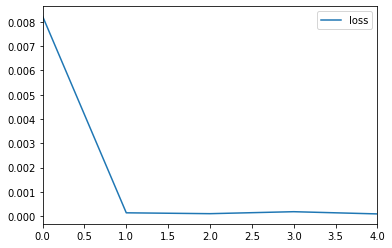

In [33]:
losses = pd.DataFrame(model.history.history)
losses.plot()